In [56]:
#pip install scikit-learn
#pip install scikit-learn scipy
#pip install openpyxl
#pip install matplotlib

In [9]:
import pandas as pd
import openpyxl as op
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt



In [10]:
# Define o caminho da pasta
caminho = r"C:\Users\Beatriz\Desktop\CURSOS\PRICING\01_Modelo_Linear_Dataset.xlsx"
# Muda o diretório atual para a pasta desejada
df = pd.read_excel(caminho, sheet_name='df')#, sheet_name='df')
df


,Data,Preco,Tigela,Refrigerante,Cerveja
0,2024-10-28,38.13,391,313,90
1,2024-10-29,37.31,418,326,100
2,2024-10-30,34.85,459,358,115
3,2024-10-31,38.95,424,331,81
4,2024-11-01,35.67,447,380,89
...,...,...,...,...,...
181,2025-04-27,34.85,447,380,103
182,2025-04-28,38.54,404,327,81
183,2025-04-29,40.59,408,310,61
184,2025-04-30,32.80,457,356,82


In [13]:

df = df.rename(columns={
    'Tigela': 'Loja_1',
    'Refrigerante': 'Loja_2',
    'Cerveja': 'Loja_3'
})


In [19]:
df

,Data,Preco,Loja_1,Loja_2,Loja_3,E(x),E(x)_Loja_1
0,2024-10-28,38.13,391,313,90,420.64,420.64
1,2024-10-29,37.31,418,326,100,426.56,426.56
2,2024-10-30,34.85,459,358,115,444.32,444.32
3,2024-10-31,38.95,424,331,81,414.73,414.73
4,2024-11-01,35.67,447,380,89,438.40,438.40
...,...,...,...,...,...,...,...
181,2025-04-27,34.85,447,380,103,444.32,444.32
182,2025-04-28,38.54,404,327,81,417.69,417.69
183,2025-04-29,40.59,408,310,61,402.89,402.89
184,2025-04-30,32.80,457,356,82,459.12,459.12


In [17]:

# Seleciona as variáveis
X = df[['Preco']]  # Variável independente
y = df['Loja_1']     # Variável dependente

# Regressão linear para obter o R²
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)

# Coeficiente de correlação de Pearson
correlacao, _ = pearsonr(df['Loja_1'], df['Preco'])

# Criar a tabela com os resultados
resultado = pd.DataFrame({
    'Métrica': ['R²', 'Correlação de Pearson'],
    'Valor': [r2, correlacao]
})

# β₀ (intercepto) e β₁ (coeficiente)
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]


# Tabela com todas as métricas
resultado = pd.DataFrame({
    'Métrica': ['R²', 'Correlação de Pearson', 'Beta 0 (Intercepto)', 'Beta 1 (Coeficiente)'],
    'Valor': [r2, correlacao, beta_0, beta_1]
})

# Criar a nova coluna E(x)
df['E(x)_Loja_1'] = (beta_0 + beta_1 * df['Preco']).round(2)

print(resultado)


                 Métrica       Valor
0                     R²    0.506748
1  Correlação de Pearson   -0.711862
2    Beta 0 (Intercepto)  695.874143
3   Beta 1 (Coeficiente)   -7.218181


                 Métrica       Valor
0                     R²    0.506748
1  Correlação de Pearson   -0.711862
2    Beta 0 (Intercepto)  695.874143
3   Beta 1 (Coeficiente)   -7.218181
        Data  Preco  Loja_1  Loja_2  Loja_3    E(x)  E(x)_Loja_1
0 2024-10-28  38.13     391     313      90  420.64       420.64
1 2024-10-29  37.31     418     326     100  426.56       426.56
2 2024-10-30  34.85     459     358     115  444.32       444.32
3 2024-10-31  38.95     424     331      81  414.73       414.73
4 2024-11-01  35.67     447     380      89  438.40       438.40


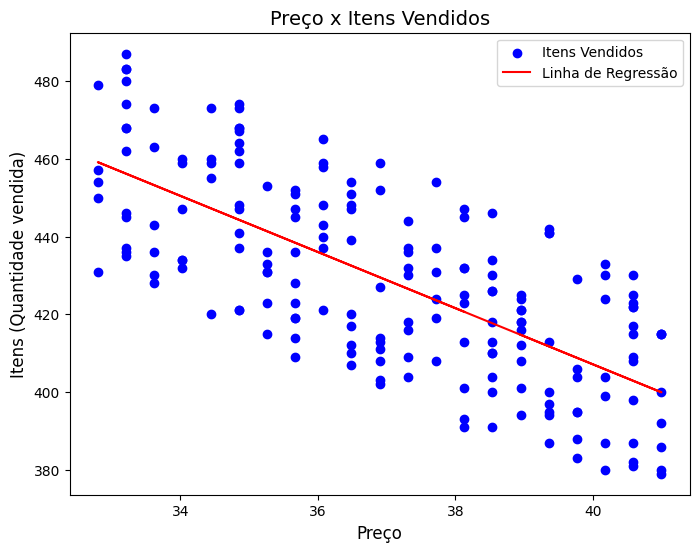

In [18]:
# Gerar o gráfico de dispersão com Preço no eixo X e Tigela no eixo Y
plt.figure(figsize=(8, 6))
plt.scatter(df['Preco'], df['Loja_1'], color='blue', label='Itens Vendidos')

# Ajustar a linha de regressão com Preço no eixo X
plt.plot(df['Preco'], modelo.predict(X), color='red', label='Linha de Regressão')

# Títulos e rótulos
plt.title('Preço x Itens Vendidos', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Itens (Quantidade vendida)', fontsize=12)

# Exibir legenda
plt.legend()

# Mostrar o gráfico
print(resultado)
print(df.head())
plt.show()

In [20]:
# Previsão para preço caso preço fosse R$50,00
preco_estimulado = 50
previsao_50 = beta_0 + beta_1 * preco_estimulado

print(f'Previsão de vendas para preço {preco_estimulado}: {previsao_50:.2f}')


Previsão de vendas para preço 50: 334.97
